# Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is HR_comma_sep.csv and first do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()/len(df)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
Department               0.0
salary                   0.0
dtype: float64

The dataset is clean

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

we have to convert department and salary into numeric variables.

In [7]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

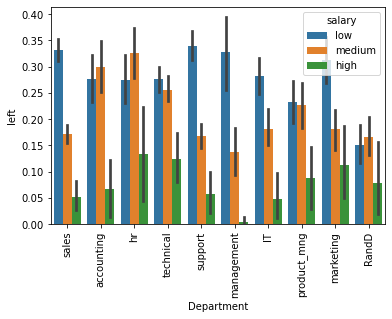

In [8]:
sns.barplot(y=df['left'],x=df['Department'],hue=df['salary'])
plt.xticks(rotation=90)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [10]:
labenc=LabelEncoder()

In [11]:
df['Department']=labenc.fit_transform(df['Department'])

In [12]:
df['Department'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

'sales'=7, 'accounting'=2, 'hr'=3, 'technical'=9, 'support'=8, 'management'=4,'IT'=0, 'product_mng'=6, 'marketing'=5, 'RandD'=1

In [13]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [14]:
df['salary']=OrdinalEncoder().fit_transform(df[['salary']])

In [15]:
df['salary'].unique()

array([1., 2., 0.])

'low'=1, 'medium'=2, 'high'=0

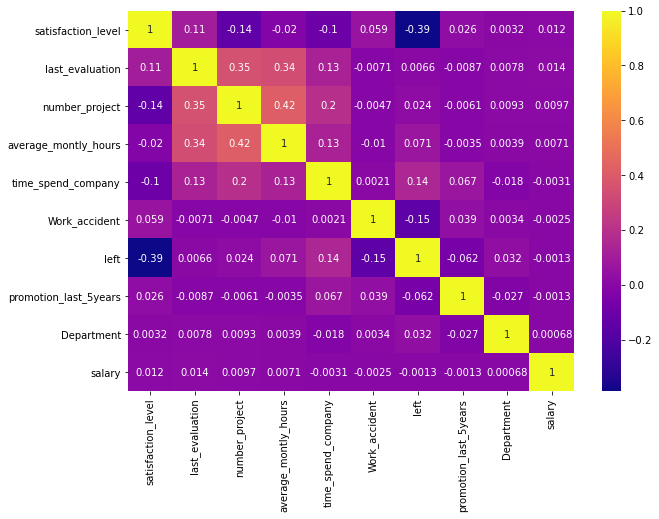

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

<AxesSubplot:xlabel='salary', ylabel='count'>

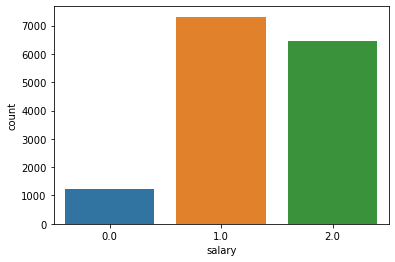

In [17]:
sns.countplot(df['salary'])

<AxesSubplot:xlabel='left', ylabel='count'>

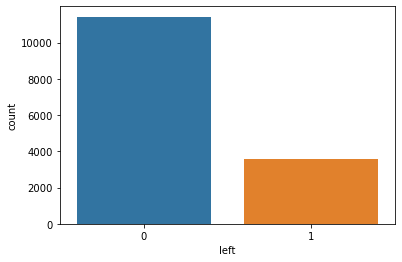

In [18]:
sns.countplot(df['left'])

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

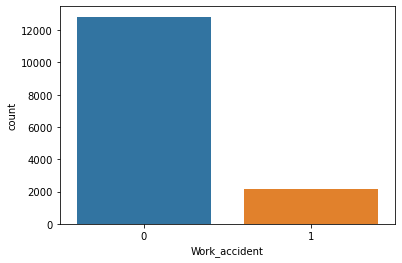

In [19]:
sns.countplot(df['Work_accident'])

<AxesSubplot:xlabel='salary', ylabel='left'>

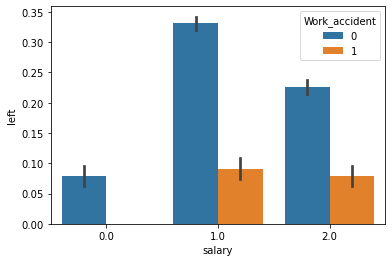

In [20]:
sns.barplot(x=df['salary'],y=df['left'],hue=df['Work_accident'])

From above chart we can understand that most of employees left because of low(1.0) salary.

In [21]:
df['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

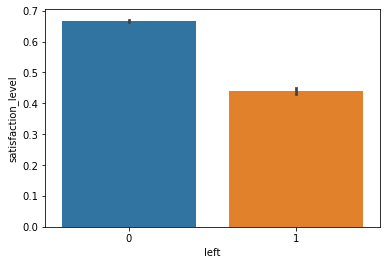

In [22]:
sns.barplot(x=df['left'],y=df['satisfaction_level'])

<AxesSubplot:xlabel='time_spend_company', ylabel='left'>

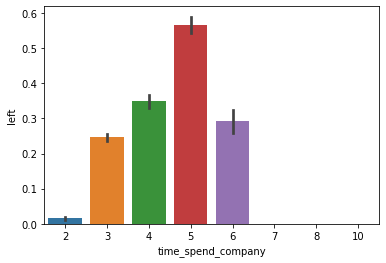

In [23]:
sns.barplot(y=df['left'],x=df['time_spend_company'])

In [24]:
X=df.iloc[:,[0,1,2,3,4,5,7,8,9]]
y=df.iloc[:,6]

In [25]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1.0
1,0.80,0.86,5,262,6,0,0,7,2.0
2,0.11,0.88,7,272,4,0,0,7,2.0
3,0.72,0.87,5,223,5,0,0,7,1.0
4,0.37,0.52,2,159,3,0,0,7,1.0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1.0
14995,0.37,0.48,2,160,3,0,0,8,1.0
14996,0.37,0.53,2,143,3,0,0,8,1.0
14997,0.11,0.96,6,280,4,0,0,8,1.0


In [26]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=103)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_train_pred=logreg.predict(X_train)
y_test_pred=logreg.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Train Data")
print(accuracy_score(y_train,y_train_pred))

print("Test Data")
print(accuracy_score(y_test,y_test_pred))

Train Data
0.7674806233852821
Test Data
0.7643333333333333


In [31]:
print("Train Data")
print(confusion_matrix(y_train,y_train_pred))

print("Test Data")
print(confusion_matrix(y_test,y_test_pred))

Train Data
[[8485  656]
 [2134  724]]
Test Data
[[2116  171]
 [ 536  177]]


In [32]:
print("Train Data")
print(classification_report(y_train,y_train_pred))

print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9141
           1       0.52      0.25      0.34      2858

    accuracy                           0.77     11999
   macro avg       0.66      0.59      0.60     11999
weighted avg       0.73      0.77      0.74     11999

Test Data
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2287
           1       0.51      0.25      0.33       713

    accuracy                           0.76      3000
   macro avg       0.65      0.59      0.60      3000
weighted avg       0.73      0.76      0.73      3000



In [33]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1913,0.42,0.57,2,147,3,1,1,0,4,1.0
9560,0.72,0.50,3,205,3,1,0,0,7,1.0
9221,0.92,0.82,4,96,4,0,0,0,0,2.0
2168,0.80,0.94,4,136,2,0,0,0,3,2.0
1934,0.78,0.93,4,225,5,0,1,0,7,2.0
12575,0.39,0.49,2,129,3,0,1,0,9,2.0
3800,0.80,0.60,5,234,2,0,0,0,0,1.0
14720,0.37,0.57,2,155,3,0,1,0,8,1.0
8686,0.60,0.60,4,197,3,0,0,0,4,2.0
5088,0.61,0.95,4,169,4,0,0,0,8,2.0


In [34]:
pred1=[[0.61,0.86,4,153,5,0,0,0,2.0]]
pred2=[[0.11,0.57,2,142,3,0,0,6,1.0]]

In [35]:
logreg.predict(pred1)

array([0], dtype=int64)

In [36]:
logreg.predict(pred2)

array([1], dtype=int64)

As we can see our model is working properly.